REPRESENTACION VISUAL DEL GRAFO

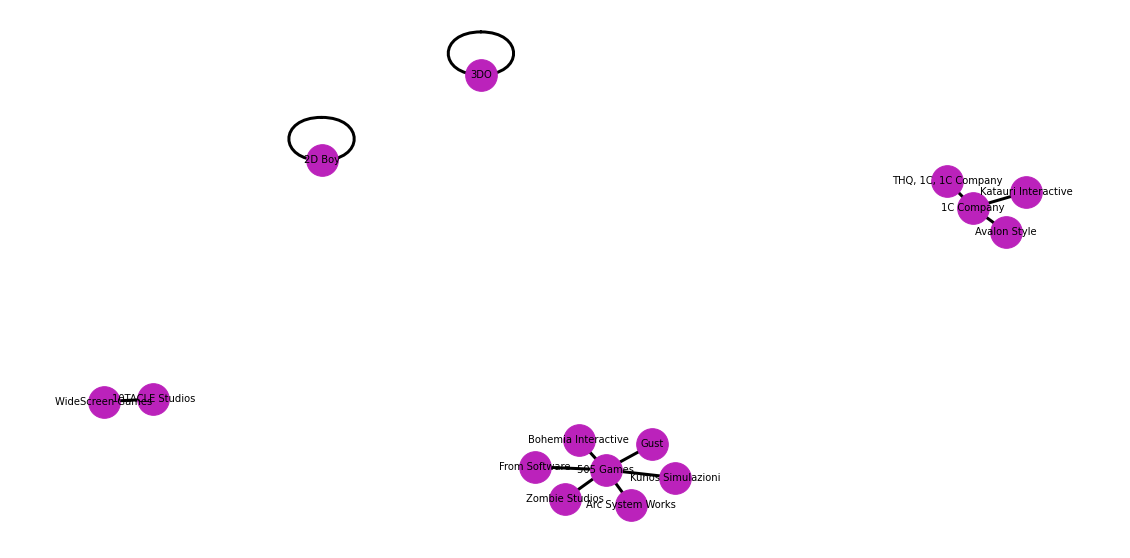

In [133]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import networkx as nx
import graphviz #libreria que deja bonito el grafo, falla en mi pc
warnings.filterwarnings("ignore")

DataFrame = pd.read_csv('Cleaned_Data_2.csv')
DataFrame = DataFrame.drop(columns= ['Critic_Score'])
DataFrame = DataFrame.drop(columns= ['Critic_Count'])
DataFrame = DataFrame.drop(columns= ['User_Score'])
DataFrame = DataFrame.drop(columns= ['User_Count'])
DataFrame = DataFrame.drop(columns= ['NA_Sales'])
DataFrame = DataFrame.drop(columns= ['EU_Sales'])
DataFrame = DataFrame.drop(columns= ['JP_Sales'])
DataFrame = DataFrame.drop(columns= ['Other_Sales'])

DataFrame = DataFrame.iloc[:30]


fig, ax = plt.subplots(figsize=(20,10))
G = nx.from_pandas_edgelist(DataFrame, source="Developer", target="Publisher")
pos=nx.spring_layout(G)
nx.draw(G, with_labels=True, ax=ax, node_size = 1000, font_size = 10, width =3, node_color='#bb22bb')
plt.show()


NUMERO DE ENLACES Y NODOS

In [132]:
print("Número de nodos:", G.number_of_nodes())
print("Número de enlaces:", G.number_of_edges())

Número de nodos: 15
Número de enlaces: 12


PRUEBA DE COMO IMPRIMIR MAS BONITO

Text(0.00016061648985736188, 0.09958166413822259, 'some text')

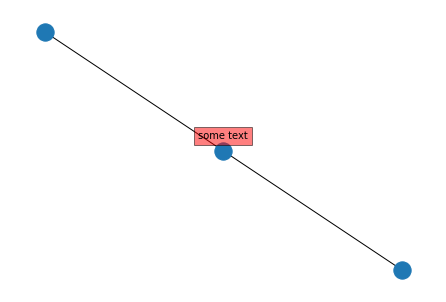

In [30]:
import networkx as nx

G=nx.path_graph(3)

pos=nx.spring_layout(G)

nx.draw(G,pos)

x,y=pos[1]

import matplotlib.pyplot as plt

plt.text(x,y+0.1,s='some text', bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')

GRADO Y VECINOS DEL NODO

In [131]:

array_booleanos = DataFrame['Publisher']
for i in range (5):
    var = DataFrame.iloc [i, 3]
    print("Los vecinos de {} en G son {}".format(var, list(G.neighbors(var))))
    


print("El grado del nodo {} es: {}".format("2D Boy", G.degree["2D Boy"]))
print("El grado del nodo {} es: {}".format("505 Games", G.degree["505 Games"]))

Los vecinos de 10TACLE Studios en G son ['WideScreen Games']
Los vecinos de 1C Company en G son ['Katauri Interactive', 'THQ, 1C, 1C Company', 'Avalon Style']
Los vecinos de 2D Boy en G son ['2D Boy']
Los vecinos de 3DO en G son ['3DO']
Los vecinos de 505 Games en G son ['Bohemia Interactive', 'From Software', 'Gust', 'Kunos Simulazioni', 'Arc System Works', 'Zombie Studios']
El grado del nodo 2D Boy es: 2
El grado del nodo 505 Games es: 6


MATRIZ DE ADYACENCIA ELEVADA A 2

In [125]:
import numpy as np

adjM = nx.adjacency_matrix(G)
adjM = adjM.todense()
#data_df = pd.DataFrame(adjM)
np.dot(adjM,adjM)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]], dtype=int32)

MATRIZ DE INCIDENCIA

In [118]:
adjM = nx.incidence_matrix(G)
adjM = adjM.todense()
data_df = pd.DataFrame(adjM)
print(data_df)



     0    1    2    3    4    5    6    7    8    9    10   11
0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

MATRIZ DE ADYACENCIA 



In [124]:
import numpy as np

adjM = nx.adjacency_matrix(G)
adjM = adjM.todense()
data_df = pd.DataFrame(adjM)
print(data_df)


    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
1    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
3    0   0   1   0   1   1   0   0   0   0   0   0   0   0   0
4    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
5    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
6    0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
7    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
8    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
9    0   0   0   0   0   0   0   0   1   0   1   1   1   1   1
10   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
11   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
12   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
13   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
14   0   0   0   0   0   0   0   0   0   1   0   0   0 